In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
# Generate sample data for price and quantity sold
np.random.seed(42)
prices = np.linspace(10, 50, 100)
quantities = np.maximum(100 - 2 * prices + np.random.normal(0, 5, 100), 0).round()  # Linear demand with constraints

# Create a DataFrame
data = pd.DataFrame({'Price': prices, 'Quantity': quantities})

data

,Price,Quantity
0,10.000000,82.0
1,10.404040,79.0
2,10.808081,82.0
3,11.212121,85.0
4,11.616162,76.0
...,...,...
95,48.383838,0.0
96,48.787879,4.0
97,49.191919,3.0
98,49.595960,1.0


In [5]:
# Fit a linear regression model
X = data[['Price']]
y = data['Quantity']
model = LinearRegression().fit(X, y)

model

LinearRegression()

In [7]:
# Predict quantity for a range of prices
price_range = np.linspace(10, 50, 100)
predicted_quantity = model.predict(price_range.reshape(-1, 1))

# Calculate revenue for each price
revenue = price_range * predicted_quantity

# Create a DataFrame
data_pred = pd.DataFrame({'Price': price_range, 'Quantity_pred': predicted_quantity,  'Revenue_pred': revenue})

data_pred

C:\Users\Alienware\miniconda3\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Price,Quantity_pred,Revenue_pred
0,10.000000,79.102772,791.027723
1,10.404040,78.303120,814.668827
2,10.808081,77.503468,837.663749
3,11.212121,76.703816,860.012487
4,11.616162,75.904164,881.715041
...,...,...,...
95,48.383838,3.135836,151.723762
96,48.787879,2.336184,113.977443
97,49.191919,1.536532,75.584941
98,49.595960,0.736880,36.546255


In [9]:

# Find the price that maximizes revenue
optimal_price = price_range[np.argmax(revenue)]
max_revenue = np.max(revenue)

# Print the optimal price and max revenue
print(f'Optimal Price: {optimal_price:.2f}')
print(f'Maximum Revenue: {max_revenue:.2f}')

Optimal Price: 24.95
Maximum Revenue: 1235.39


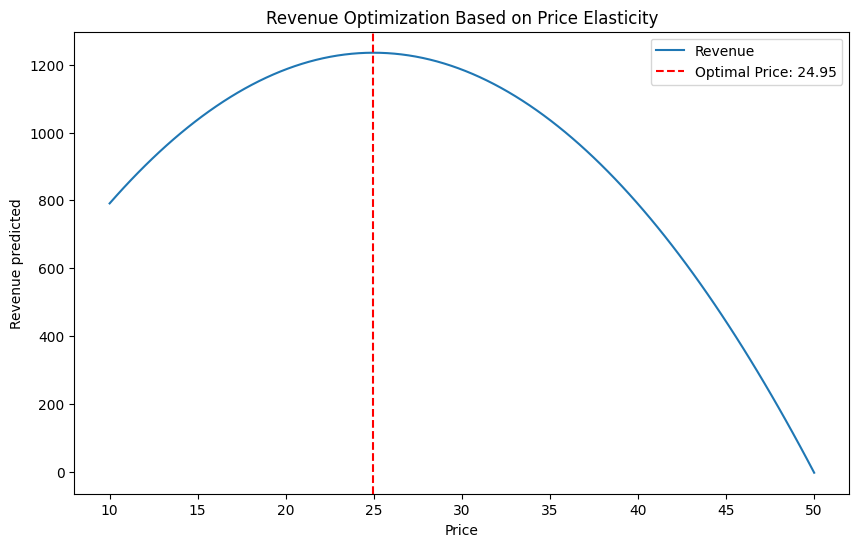

In [10]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(price_range, revenue, label='Revenue')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: {optimal_price:.2f}')
plt.xlabel('Price')
plt.ylabel('Revenue predicted')
plt.title('Revenue Optimization Based on Price Elasticity')
plt.legend()
plt.show()